# Orders - Multivariate Regression of  the `review_score`

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Utilizar de dataset el resultado de la clase pasada (con la distancia)



In [3]:
orders = pd.read_csv("C:\\Users\\martu\\Downloads\\Orders/tablon_primario.cv")

Let's recall our simple analysis from yesterday's exercise: 

¿ Aqué esta correlacionada `review_score`?
 * Si dos variables tmb tienen correlación entre sí deberíamos analizarla por separado
  *  Probar con `statsmodels`: `tiempo_de_espera` y `real_vs_esperado`

In [4]:
orders.dtypes

Unnamed: 0                         int64
order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
tiempo_de_espera                 float64
tiempo_de_espera_previsto        float64
real_vs_esperado                 float64
es_cinco_estrellas                 int64
es_una_estrella                    int64
review_score                       int64
number_of_products                 int64
vendedores_unicos                  int64
precio                           float64
transporte                       float64
distance_seller_customer         float64
dtype: object

In [4]:
orders_corr = orders.loc[:, 'tiempo_de_espera':'distance_seller_customer']

In [5]:
orders_corr

,tiempo_de_espera,tiempo_de_espera_previsto,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,number_of_products,vendedores_unicos,precio,transporte,distance_seller_customer
0,8.436574,15.544063,0.0,0,0,4,1,1,29.99,8.72,18.063837
1,13.782037,19.137766,0.0,0,0,4,1,1,118.70,22.76,856.292580
2,9.394213,26.639711,0.0,1,0,5,1,1,159.90,19.22,514.130333
3,13.208750,26.188819,0.0,1,0,5,1,1,45.00,27.20,1822.800366
4,2.873877,12.112049,0.0,1,0,5,1,1,19.90,8.72,30.174037
...,...,...,...,...,...,...,...,...,...,...,...
95875,8.218009,18.587442,0.0,1,0,5,1,1,72.00,13.08,69.481037
95876,22.193727,23.459051,0.0,0,0,4,1,1,174.90,20.10,474.098245
95877,24.859421,30.384225,0.0,1,0,5,1,1,205.99,65.02,968.051192
95878,17.086424,37.105243,0.0,0,0,2,2,1,359.98,81.18,370.146853


<Axes: >

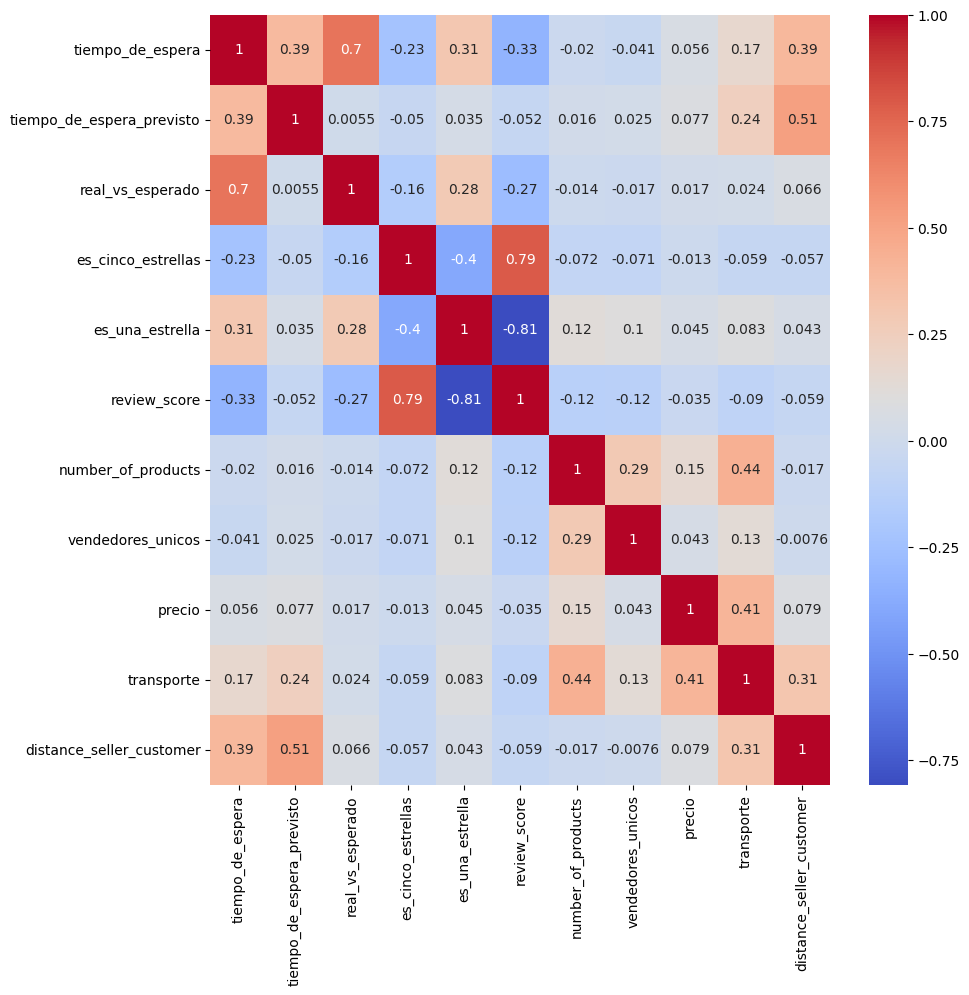

In [6]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    orders_corr.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

In [17]:
#Hay una correlación alta positiva entre review_score y es_cinco_estrellas, y una correlación alta negativa con es_una_estrella. Que es de esperar porque estas 2 columnas derivan de review_score


<AxesSubplot:>

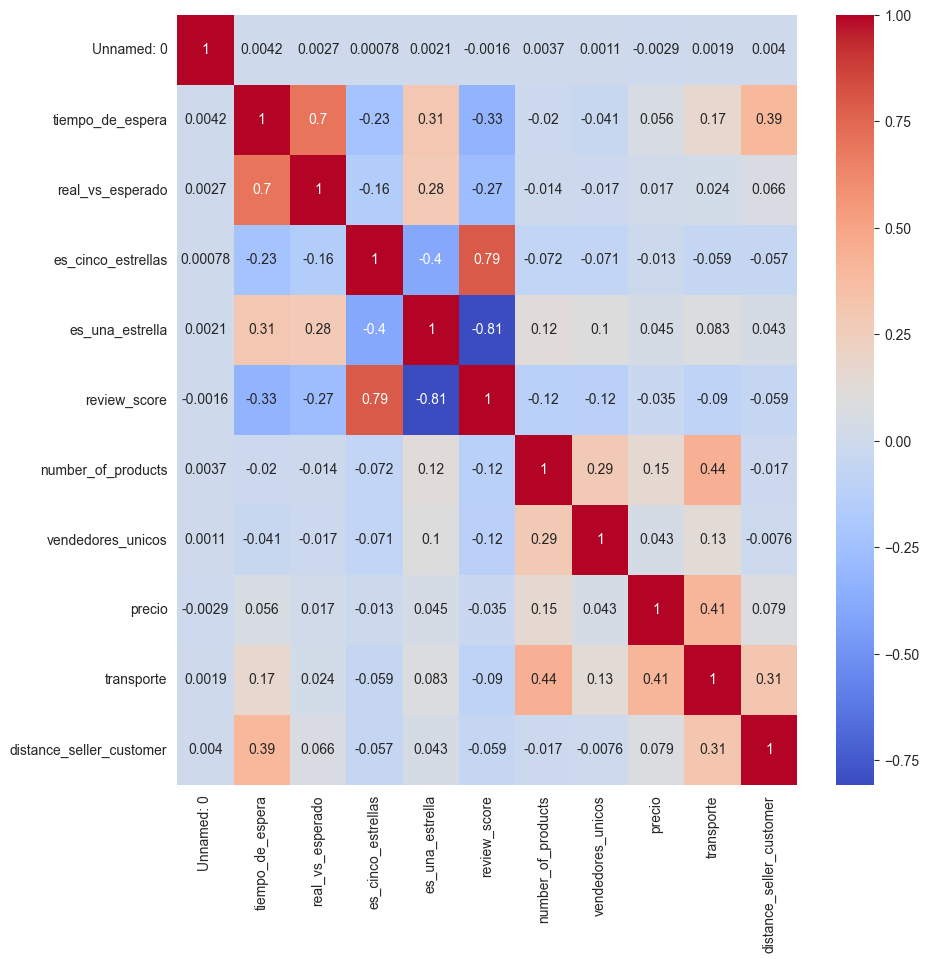

In [22]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    orders.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

## 1 - Regresión Univariada

Usar [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) con `statsmodels.formula.api`
 - `model1`: una regresión ols de `review_score` sobre `tiempo_de_espera`
 - `model2`: una regresión ols de `review_score` sobre `real_vs_esperado`

Para cada uno, imprima la tabla `summary` e interprete los resultados:
- Entender cómo estos resultados coinciden con los del diagrama de seaborn
- Interpretar `R-squared`, así como `coeficientes de regresión individuales`, `valores t`, `valores p` e `intervalos de confianza del 95 %`

***Modelo 1***:

In [7]:
import statsmodels.formula.api as smf
model = smf.ols(formula='review_score ~ tiempo_de_espera', data=orders)

# Train the model to find best line
model = model.fit()
model.summary()

# Programar acá

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:18:24   Log-Likelihood:            -1.5441e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.7236      0.006    727.904      0.000       4.711       4.736
tiempo_de_espera    -0.0454      0.000   -109.730      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19552.934   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35454.407
Skew:                          -1.300   Prob(JB):                         0.00
Kurtosis:                       4.453   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# el valor df f-statistic es 1.208e+04, esto significa que el modelo es estadísticamente significativo ya que es mayor a 1.
# En ambos casos, el p-valor es 0, lo cual significa que ambos coeficientes son estadísticamente significativos
# El modelo nos dice que el valor del coeficiente de tiempo_de_espera se encuentre entre -0.046 y -0.045 con un 95% de confianza. En general nos indica que si aumenta el tiempo de espera en una unidad el review score disminuye en 0.0453 unidades 

***Modelo 2***:

In [8]:
model2 = smf.ols(formula='review_score ~ real_vs_esperado', data=orders)

# Train the model to find best line
model2 = model2.fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:18:31   Log-Likelihood:            -1.5639e+05
No. Observations:               95872   AIC:                         3.128e+05
Df Residuals:                   95870   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2121      0.004   1041.192      0.000       4.204       4.220
real_vs_esperado    -0.0752      0.001    -87.644      0.000      -0.077      -0.073
==============================================================================
Omnibus:                    20662.535   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49770.507
Skew:                          -1.203   Prob(JB):                         0.00
Kurtosis:                       5.582   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# el valor df f-statistic es 7715, esto significa que el modelo es estadísticamente significativo ya que es mayor a 1.
# En ambos casos, el p-valor es 0, lo cual significa que ambos coeficientes son estadísticamente significativos
# El modelo nos dice que el valor del coeficiente de tiempo_de_espera se encuentre entre -0.077 y -0.073 con un 95% de confianza. En general nos indica que si aumenta el tiempo de espera en una unidad el review score disminuye en 0.0751 unidades 
#Ambos modelos devuelven r cuadrados bajos lo cual signfica que la variación en tiempo esperado y real_vs_esperado pueden explicar muy poca de la variaicón en review score, 0.111 y 0.074, respectivamente.
#El tiempo de espera explica más de la variación de review_score

## 2 - Multivariate regression

***responder***
¿Cual es el impacto en `review_score` agregando un día más de `real_vs_esperado` manteniendo todo lo otro constante? ¿Cuál es más explicativa de `review_score`,`tiempo_de_espera` o `real_vs_esperado` ?



***Modelo 3***:

In [10]:
orders['real_vs_esperado'] = orders['real_vs_esperado'] + 1

In [11]:
model3 = smf.ols(formula='review_score ~ tiempo_de_espera + real_vs_esperado', data=orders).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6191.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:18:44   Log-Likelihood:            -1.5426e+05
No. Observations:               95872   AIC:                         3.085e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6707      0.007    652.723      0.000       4.657       4.685
tiempo_de_espera    -0.0383      0.001    -65.969      0.000      -0.039      -0.037
real_vs_esperado    -0.0205      0.001    -17.417      0.000      -0.023      -0.018
==============================================================================
Omnibus:                    19995.754   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40513.333
Skew:                          -1.249   Prob(JB):                         0.00
Kurtosis:                       4.976   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Programar

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6191.
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:05:10   Log-Likelihood:            -1.5426e+05
No. Observations:               95872   AIC:                         3.085e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6502      0.008  

Nuestra regresión multivariante nos permite aislar el impacto de una característica, mientras controlamos el efecto de otras características. Estos nuevos coeficientes se denominan **`coeficientes de correlación parcial`**.

In [ ]:
# En todas las variables los p-valores son 0, lo cual significa que son estadísticamente significativos. Y esto también lo confirma el valor F que en este caso es de 6191.

 R-squared es bastante bajo: no más del 12 % de las variaciones de review_score se explican por las variaciones combinadas de `tiempo_de_espera` y `real_vs_esperado`.

Intentemos agregar más variables a nuestra regresión para mejorar la explicabilidad de la regresión lineal.

Crear un nuevo OLS `model4` con más características del conjunto de datos `orders`.
- No agregar dos características perfectamente colineales entre sí
-  Transformar cada variables $X_i$ con el respectivo z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$  para comparar los coeficientes de regresión parcial $\beta_i$ en conjuntos.  $\beta_i$ no estará en la misma dimensión.

***Modelo 4***:

¿Que variables considerar?

In [12]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'tiempo_de_espera',
       'tiempo_de_espera_previsto', 'real_vs_esperado', 'es_cinco_estrellas',
       'es_una_estrella', 'review_score', 'number_of_products',
       'vendedores_unicos', 'precio', 'transporte',
       'distance_seller_customer'],
      dtype='object')

In [13]:
features = ['tiempo_de_espera', 'real_vs_esperado', 'number_of_products', 'vendedores_unicos', 'precio', 'transporte', 'distance_seller_customer']

In [14]:
orders[features]. dtypes

tiempo_de_espera            float64
real_vs_esperado            float64
number_of_products            int64
vendedores_unicos             int64
precio                      float64
transporte                  float64
distance_seller_customer    float64
dtype: object

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
orders[features] = scaler.fit_transform(orders[features])

In [16]:
orders

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,tiempo_de_espera_previsto,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,number_of_products,vendedores_unicos,precio,transporte,distance_seller_customer
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-0.431195,15.544063,-0.161782,0,0,4,-0.264585,-0.11254,-0.513831,-0.652039,-0.979454
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.134174,19.137766,-0.161782,0,0,4,-0.264585,-0.11254,-0.086652,0.000493,0.429801
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-0.329909,26.639711,-0.161782,1,0,5,-0.264585,-0.11254,0.111745,-0.164035,-0.145453
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.073540,26.188819,-0.161782,1,0,5,-0.264585,-0.11254,-0.441551,0.206849,2.054722
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-1.019540,12.112049,-0.161782,1,0,5,-0.264585,-0.11254,-0.562419,-0.652039,-0.959094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,95875,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,-0.454311,18.587442,-0.161782,1,0,5,-0.264585,-0.11254,-0.311534,-0.449401,-0.893010
95876,95876,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.023847,23.459051,-0.161782,0,0,4,-0.264585,-0.11254,0.183977,-0.123135,-0.212756
95877,95877,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.305787,30.384225,-0.161782,1,0,5,-0.264585,-0.11254,0.333690,1.964596,0.617693
95878,95878,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.483667,37.105243,-0.161782,0,0,2,1.601698,-0.11254,1.075222,2.715658,-0.387522


In [10]:
#standarizar features numericos

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,number_of_products,vendedores_unicos,precio,transporte,distance_seller_customer
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-0.431192,-0.161774,0,0,4,-0.264583,-0.11254,-0.513828,-0.652036,-0.979449
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.134174,-0.161774,0,0,4,-0.264583,-0.11254,-0.086651,0.000493,0.429798
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-0.329907,-0.161774,1,0,5,-0.264583,-0.11254,0.111745,-0.164034,-0.145452
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.073540,-0.161774,1,0,5,-0.264583,-0.11254,-0.441549,0.206848,2.054711
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-1.019535,-0.161774,1,0,5,-0.264583,-0.11254,-0.562416,-0.652036,-0.959089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,95875,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,-0.454309,-0.161774,1,0,5,-0.264583,-0.11254,-0.311532,-0.449399,-0.893005
95876,95876,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.023841,-0.161774,0,0,4,-0.264583,-0.11254,0.183976,-0.123135,-0.212755
95877,95877,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.305780,-0.161774,1,0,5,-0.264583,-0.11254,0.333688,1.964585,0.617689
95878,95878,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.483664,-0.161774,0,0,2,1.601690,-0.11254,1.075217,2.715644,-0.387520


Crear el `modelo4`

In [17]:
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ tiempo_de_espera + real_vs_esperado + number_of_products + vendedores_unicos + precio + transporte + distance_seller_customer'

In [18]:
model4 = smf.ols(formula, data=orders)

# Train the model to find best line
model4 = model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2322.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:19:15   Log-Likelihood:            -1.5258e+05
No. Observations:               95872   AIC:                         3.052e+05
Df Residuals:                   95864   BIC:                         3.052e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.1555      0.004   1082.730      0.000       4.148       4.163
tiempo_de_espera            -0.4397      0.006    -70.719      0.000      -0.452      -0.428
real_vs_esperado            -0.0515      0.006     -9.023      0.000      -0.063      -0.040
number_of_products          -0.1297      0.004    -28.861      0.000      -0.139      -0.121
vendedores_unicos           -0.1314      0.004    -32.747      0.000      -0.139      -0.124
precio                      -0.0029      0.004     -0.696      0.486      -0.011       0.005
transporte                   0.0043      0.005      0.868      0.385      -0.005       0.014
distance_seller_customer     0.0967      0.005     20.984      0.000       0.088       0.106
==============================================================================
Omnibus:                    18749.799   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37820.902
Skew:                          -1.175   Prob(JB):                         0.00
Kurtosis:                       4.986   Cond. No.                         3.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
- ¿Cuáles son las características más importantes? (hacer un gráfico de barras para visualizarlos bien)
- ¿Cómo ha cambiado el rendimiento general de la regresión?
- ¿Es esta regresión estadísticamente significativa?

In [21]:
# El p-value es menor a 0.05 en todas las variables lo cual significa que son estdísticamente significatias y por ende importantes.
# Este modelo es capaz de explicar una mayor parte de la variabilidad de review-score que los otros modelos ya que el r cuadrardo es mayor.
# El estadístico f es mayor a 1 lo cual significa que el modelo es estadísticamente significativo
# La variable con mayor impacto es tiempo_de_espera ya que en términos absolutos posee el coeficiente mayor (-0.4397). Esto significa que un aumento de un día en la variable 'tiempo_de_espera' está asociado con una disminución de 0.4397 unidades en el review_score.
# 'number_of_products' y 'vendedores_unicos' tienen coeficientes negativos. Esto significa que un mayor número de productos o vendedores está asociado con una disminución en el review_score.
# 'Precio' tiene un coeficiente negativo, esto significa que un aumento en el precio está asociado con una disminución en el review_Score. 
#'Transporte' tiene un coeficiente positivo , esto significa que un aumento en el transporte está asociado con un aumento en el review_score.
#'distance_seller_customer' tiene un coeficiente positivo , esto significa que un aumento en el transporte está asociado con un aumento en el review_score.


- ¿Cual es la variable que más impacto tiene?
- qué pasa con productos y vendedores cuando hay más?
- Que pasa con la distancia?
- Que pasa con precio y transporte?
    
- Qué pasa con F-statistics y p-value?

- Analizar R cuadrado

Un R cuadrado bajo es común cuando el número de observaciones (n) es mucho mayor que el número de características (p). Todavía se pueden derivar ideas relevantes de tales regresiones, siempre que sean estadísticamente significativas.





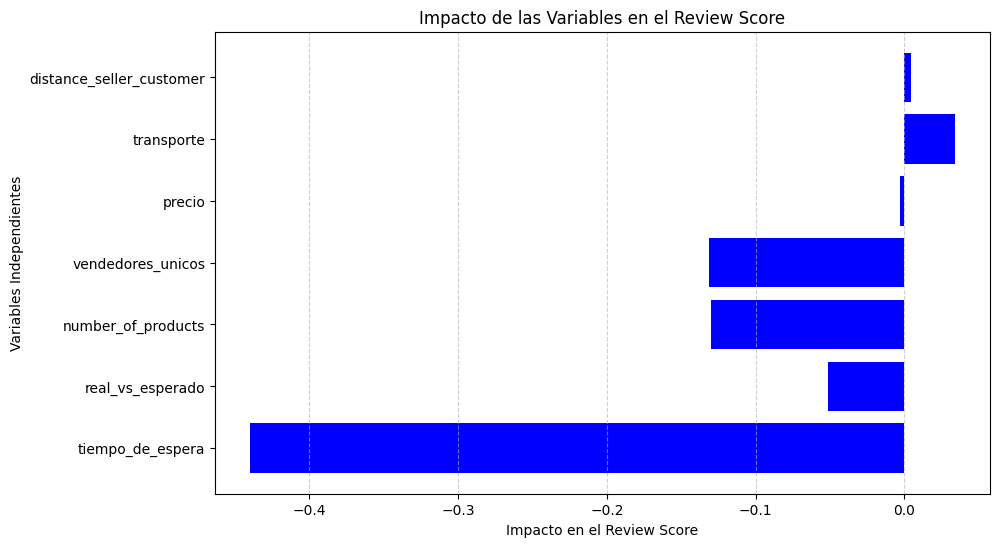

In [19]:
coeficientes = [-0.4397, -0.0515, -0.1297, -0.1314, -0.0029, 0.0339, 0.0043]
variables = ['tiempo_de_espera', 'real_vs_esperado', 'number_of_products', 'vendedores_unicos', 'precio', 'transporte', 'distance_seller_customer']

plt.figure(figsize=(10, 6))
plt.barh(variables, coeficientes, color='blue')
plt.xlabel('Impacto en el Review Score')
plt.ylabel('Variables Independientes')
plt.title('Impacto de las Variables en el Review Score')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

## 3 - Chequear la performance de modelos

¡El rendimiento de la regresión no debe medirse solo por su R-cuadrado!

Siempre visualice la distribución de las predicciones, y especialmente los residuales.

* Calcular los residuos.

Debería ver que la media de los residuos es igual a 0 (siempre verificado en un contexto de regresión lineal)

In [60]:
predicted_scores = model4.predict(orders[features])
predicted_scores

0        4.306541
1        4.195774
2        4.342925
3        4.381518
4        4.567373
           ...   
95875    4.325346
95876    3.741076
95877    3.705966
95878    3.729257
95879    4.443174
Length: 95880, dtype: float64

In [61]:
residuals = predicted_scores - orders['review_score']
residuals

0        0.306541
1        0.195774
2       -0.657075
3       -0.618482
4       -0.432627
           ...   
95875   -0.674654
95876   -0.258924
95877   -1.294034
95878    1.729257
95879   -0.556826
Length: 95880, dtype: float64

In [71]:
mean_residuals = np.mean(residuals)
mean_residuals

-1.4292083315668571e-15

In [ ]:
#Está muy cerca de 0 que es lo esperado y lo que debería ocurrir

Computar rmse

In [62]:
rmse = {'review_score': orders['review_score'], 'predicted_scores': predicted_scores}
rmse = pd.DataFrame(rmse)

In [63]:
rmse = rmse.dropna()

In [64]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(rmse['review_score'], rmse['predicted_scores'])
rmse = np.sqrt(mse)
rmse

1.1883154116821097

In [ ]:
#Esto significa que las predicciones del modelo tienen errores de alrededror de 1.1883154116821097 unidades. Cuánto menor es este valor mejor son las predicciones del modelo ya qu se acercan mas a su valor verdadero.

In [15]:
##codear RMS (Buscar en wikipedia)

1.1883154116821097

Plotear los resultados

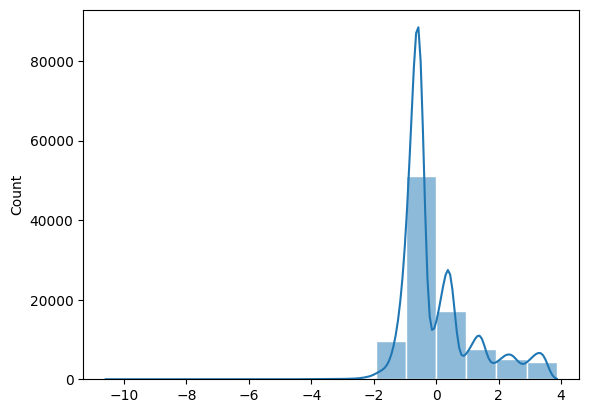

In [65]:
sns.histplot(residuals, kde=True, edgecolor='w', bins=15);

Text(0.5, 1.0, 'residuals density plot')

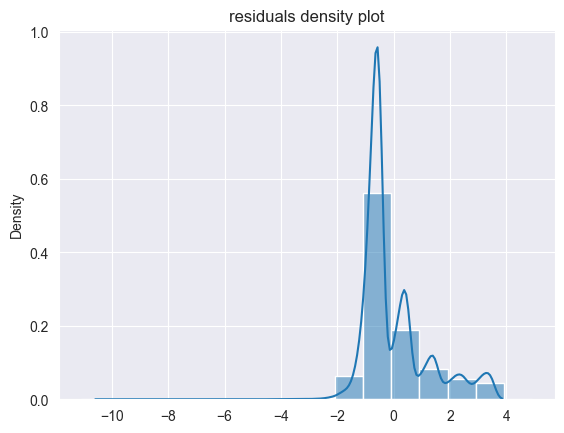

* ¿Por qué la trama residual tiene una forma tan extraña?

Plotea en el mismo gráfico tanto la distribución de `review_score` como la distribución de `predicted_review_score`.

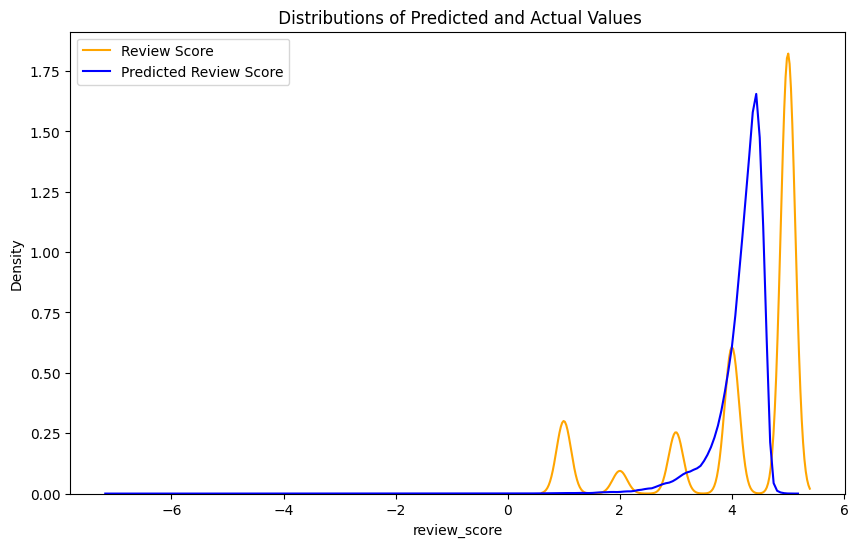

In [66]:
scores = {'review_score': orders['review_score'], 'predicted_scores': predicted_scores}
scores = pd.DataFrame(scores)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=scores['review_score'], color='orange', label='Review Score')
sns.kdeplot(data=scores['predicted_scores'], color='blue', label='Predicted Review Score')
plt.xlabel('review_score')
plt.title(' Distributions of Predicted and Actual Values')
plt.legend()
plt.show()

In [ ]:
# Los residuos tienen esa forma rara porque si vemos el último gráfico podemos ver que hay varias partes donde la línea de review_score queda por sobre la de predicted_review_score. Lo cual significa que el residual es negativo y vemos una gran proporción de residuales entre el 0 y -1.

Text(0.5, 1.0, 'distribution of predicted and actual values')

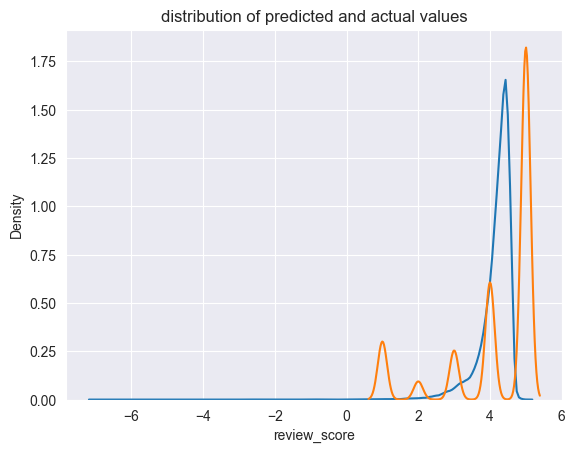

Usando `seaborn`, ya podríamos haber trazado una `línea de regresión` de `review_score` frente a `real_vs_esperado`

Hacelo con una sub-`muestra` de la población, y una vez con la `toda la población`.

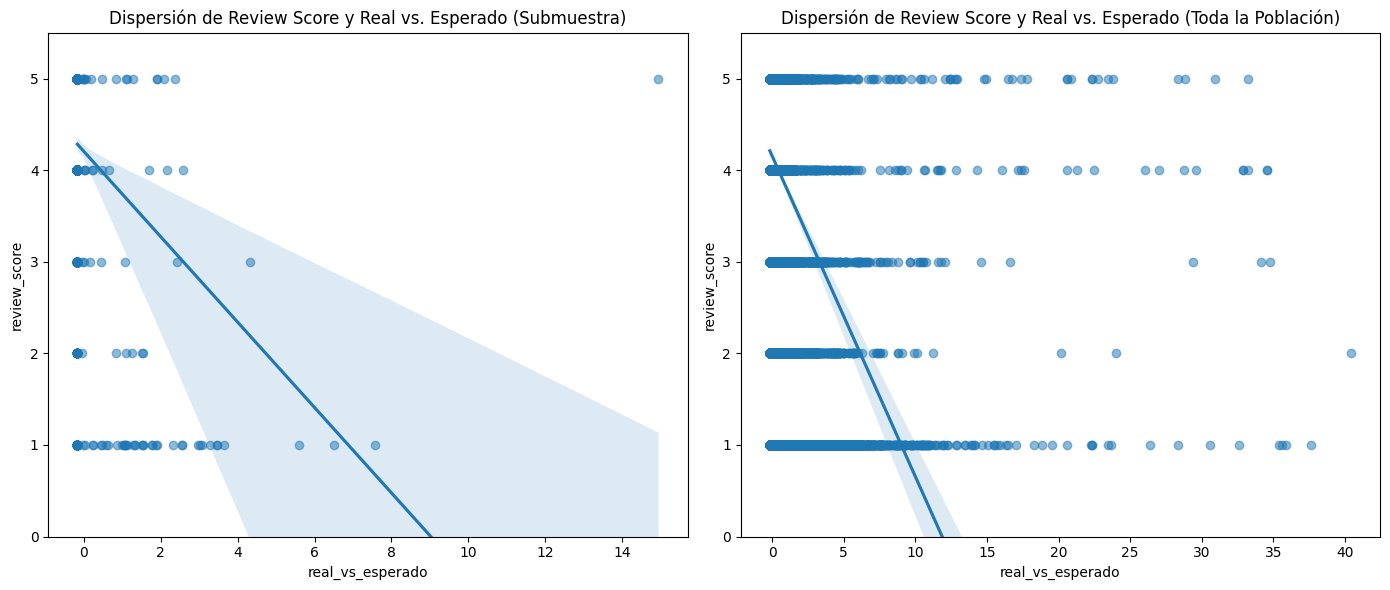

In [67]:
subset = orders.sample(n=1000, random_state=42)  

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.regplot(data=subset, x='real_vs_esperado', y='review_score', scatter_kws={'alpha':0.5}, ax=axes[0])
axes[0].set_title('Dispersión de Review Score y Real vs. Esperado (Submuestra)')
axes[0].set_ylim(0, 5.5)

sns.regplot(data=orders, x='real_vs_esperado', y='review_score', scatter_kws={'alpha':0.5}, ax=axes[1])
axes[1].set_title('Dispersión de Review Score y Real vs. Esperado (Toda la Población)')
axes[1].set_ylim(0, 5.5)
plt.tight_layout()

plt.show()






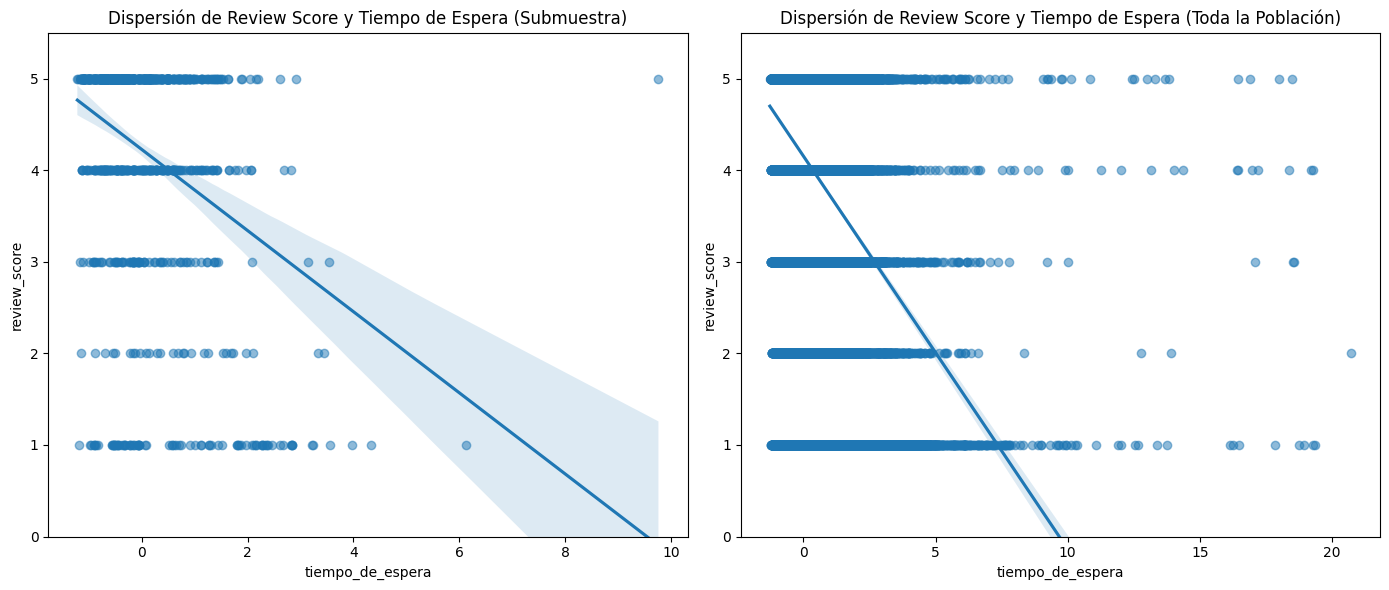

In [68]:
subset = orders.sample(n=1000, random_state=42)  

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.regplot(data=subset, x='tiempo_de_espera', y='review_score', scatter_kws={'alpha':0.5}, ax=axes[0])
axes[0].set_title('Dispersión de Review Score y Tiempo de Espera (Submuestra)')
axes[0].set_ylim(0, 5.5)

sns.regplot(data=orders, x='tiempo_de_espera', y='review_score', scatter_kws={'alpha':0.5}, ax=axes[1])
axes[1].set_title('Dispersión de Review Score y Tiempo de Espera (Toda la Población)')
axes[1].set_ylim(0, 5.5)
plt.tight_layout()

plt.show()

In [ ]:
#En ambos casos vemos que la línea de regresión no es muy buena prediciendo el score con ninguna de las 2 variables lo cual no es sorpresivo teniendo en cuenta el r2.

(0.0, 5.942038100814559)

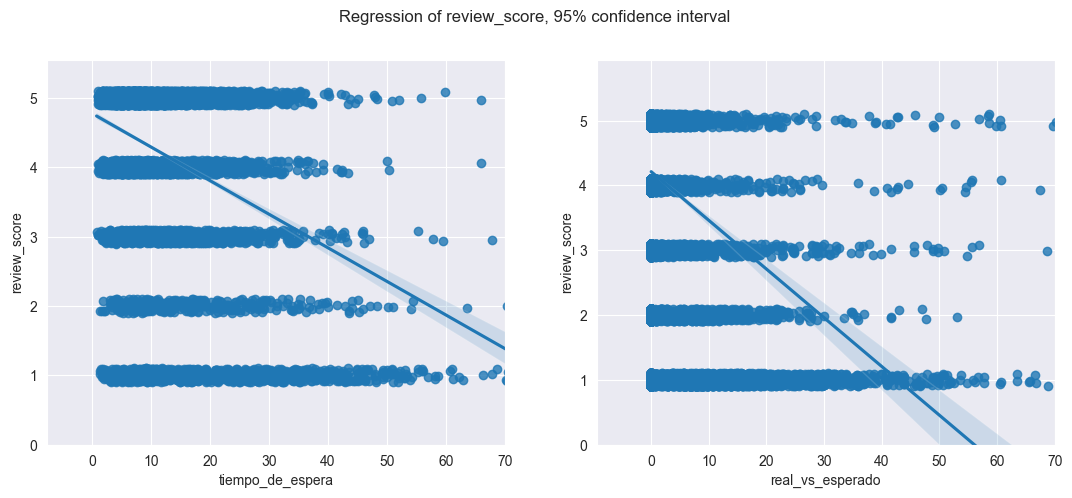